In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get data

df = pd.read_csv("advertising_and_sales_clean.csv")

In [3]:
# get data to train 

df = df.drop(['influencer'], axis = 1)
x_train = df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values.reshape(x_train.shape[0], 1)

In [4]:
# use MinMaxScaler method to normalize the data

def normalize_and_add_ones(x):
    x_max = np.max(x, axis = 0)
    x_min = np.min(x, axis = 0)
    x = (x - x_min)/(x_max - x_min)
    return np.column_stack((np.ones_like(y_train), x))

x_train = normalize_and_add_ones(x_train)

In [5]:
# the hypothesis function

def hypo(x_train, w):
    return x_train@w

In [10]:
# loss function

def loss(x_train, w):
    loss = np.mean((hypo(x_train, w) - y_train)**2)
    return loss

In [11]:
# gradient of the loss function

def gradient(x_train, w):
    grad = x_train.T@(hypo(x_train, w) - y_train)
    return grad/x_train.shape[0]

In [14]:
# initialize the parameters

w = np.random.normal(size = [x_train.shape[1], 1])
learning_rate = 1.2
num_epochs = 500

array([[-0.81925433],
       [ 0.31425316],
       [ 0.39614923],
       [-2.71902555]])

In [16]:
# use GD to optimize w
cost = []

for epoch in range(num_epochs):
    grad = gradient(x_train, w)
    w -= learning_rate * grad
    print("after epoch {} loss is {}".format(epoch, loss(x_train, w)**0.5))
    cost.append(loss(x_train, w)**0.5)

after epoch 0 loss is 2962.3004237561518
after epoch 1 loss is 2962.0984015518834
after epoch 2 loss is 2961.8993376274193
after epoch 3 loss is 2961.7031888550623
after epoch 4 loss is 2961.5099127303392
after epoch 5 loss is 2961.3194673631533
after epoch 6 loss is 2961.131811469061
after epoch 7 loss is 2960.946904360662
after epoch 8 loss is 2960.764705939109
after epoch 9 loss is 2960.5851766857368
after epoch 10 loss is 2960.40827765381
after epoch 11 loss is 2960.233970460371
after epoch 12 loss is 2960.0622172782137
after epoch 13 loss is 2959.8929808279613
after epoch 14 loss is 2959.726224370254
after epoch 15 loss is 2959.5619116980465
after epoch 16 loss is 2959.4000071290093
after epoch 17 loss is 2959.2404754980394
after epoch 18 loss is 2959.0832821498684
after epoch 19 loss is 2958.9283929317794
after epoch 20 loss is 2958.7757741864207
after epoch 21 loss is 2958.6253927447183
after epoch 22 loss is 2958.477215918895
after epoch 23 loss is 2958.3312114955797
after epoc

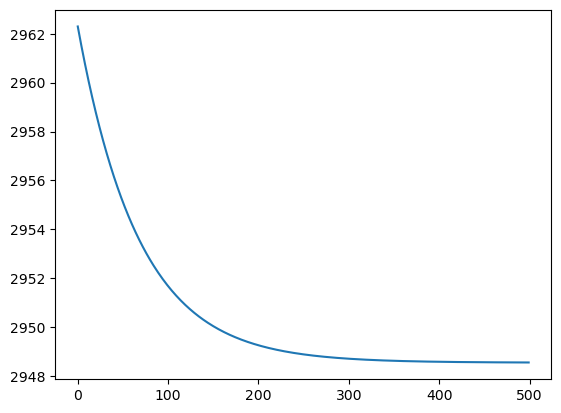

In [18]:
plt.plot(cost);